## Risk and return models


- compare 
    - different risk models predict an out-of-sample covariance matrix
    - different returns models predict out-of-sample returns


### 1. Risk models

In [1]:
! pip install pandas numpy matplotlib PyPortfolioOpt
# import os
# if not os.path.isdir('data'):
#     os.system('git clone https://github.com/robertmartin8/PyPortfolioOpt.git')
#     os.chdir('PyPortfolioOpt/cookbook')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.9/61.9 kB 261.3 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 208.7 kB/s eta 0:00:0000:0100:01
  Using cached osqp-0.6.3-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (299 kB)
  Using cached ecos-2.0.12-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (221 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 571.9 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 1.4 MB/s eta 0:00:0000:0100:01m
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Using cached qdldl-0.1.7.post0-cp38-cp38-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypfopt
from pypfopt import risk_models, expected_returns, plotting
pypfopt.__version__

'1.5.5'

In [5]:
df = pd.read_csv("data/stock_prices.csv", parse_dates=True, index_col="date")
print(df.head())
print(df.tail())
print(df.shape)

            GOOG      AAPL  FB  BABA  AMZN        GE     AMD       WMT  \
date                                                                     
1989-12-29   NaN  0.117203 NaN   NaN   NaN  0.352438  3.9375  3.486070   
1990-01-02   NaN  0.123853 NaN   NaN   NaN  0.364733  4.1250  3.660858   
1990-01-03   NaN  0.124684 NaN   NaN   NaN  0.364050  4.0000  3.660858   
1990-01-04   NaN  0.125100 NaN   NaN   NaN  0.362001  3.9375  3.641439   
1990-01-05   NaN  0.125516 NaN   NaN   NaN  0.358586  3.8125  3.602595   

                 BAC  GM         T  UAA  SHLD       XOM  RRC       BBY  MA  \
date                                                                         
1989-12-29  1.752478 NaN  2.365775  NaN   NaN  1.766756  NaN  0.166287 NaN   
1990-01-02  1.766686 NaN  2.398184  NaN   NaN  1.766756  NaN  0.173216 NaN   
1990-01-03  1.780897 NaN  2.356516  NaN   NaN  1.749088  NaN  0.194001 NaN   
1990-01-04  1.743005 NaN  2.403821  NaN   NaN  1.731422  NaN  0.190537 NaN   
1990-01-05  1

In [ ]:
past_df, future_df = df.iloc[:-250], df.iloc[-250:]

In [ ]:
future_cov = risk_models.sample_cov(future_df)

sample_cov = risk_models.sample_cov(past_df)

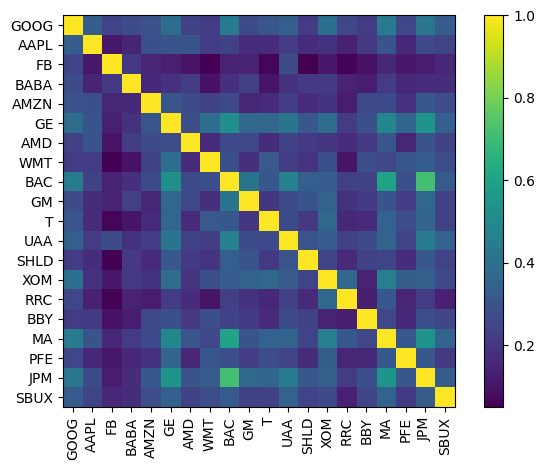

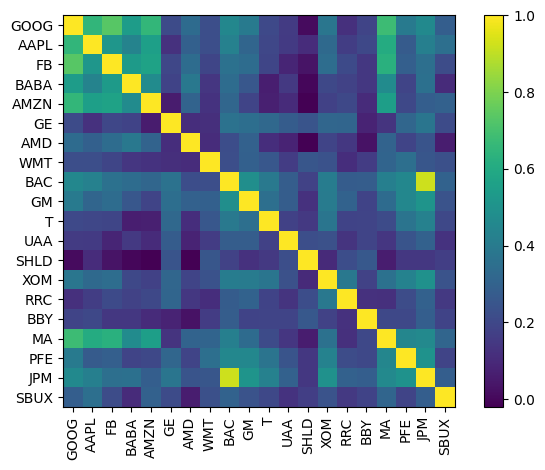

In [4]:


plotting.plot_covariance(sample_cov, plot_correlation=True)
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()

- We can see that visually, 
    - the sample covariance does not capture some of the new features of the covariance matrix, 
    - for example the highly correlated group of FAANG stocks. 
- We may be able to improve this by 
    - using an exponentially-weighted covariance matrix, which gives more weight to recent data. 
    - We can also look at how each model predicts future variance.

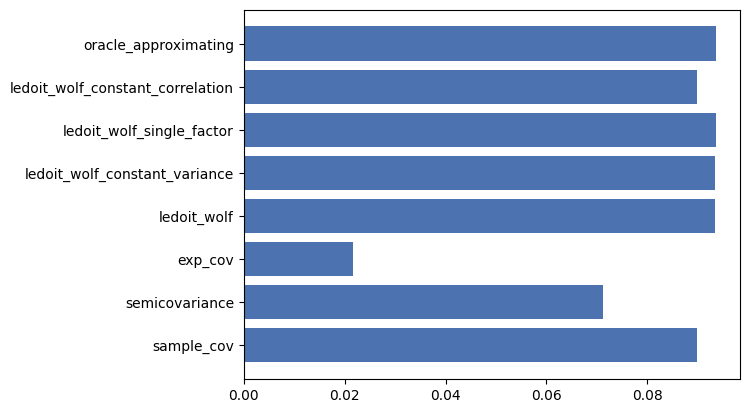

In [6]:
future_variance = np.diag(future_cov)
mean_abs_errors = []

risk_methods = [
    "sample_cov",
    "semicovariance",
    "exp_cov",
    "ledoit_wolf",
    "ledoit_wolf_constant_variance",
    "ledoit_wolf_single_factor",
    "ledoit_wolf_constant_correlation",
    "oracle_approximating",
]

for method in risk_methods:
    S = risk_models.risk_matrix(df, method=method)
    variance = np.diag(S)
    mean_abs_errors.append(np.sum(np.abs(variance - future_variance)) / len(variance))
    
xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, risk_methods)
plt.show()

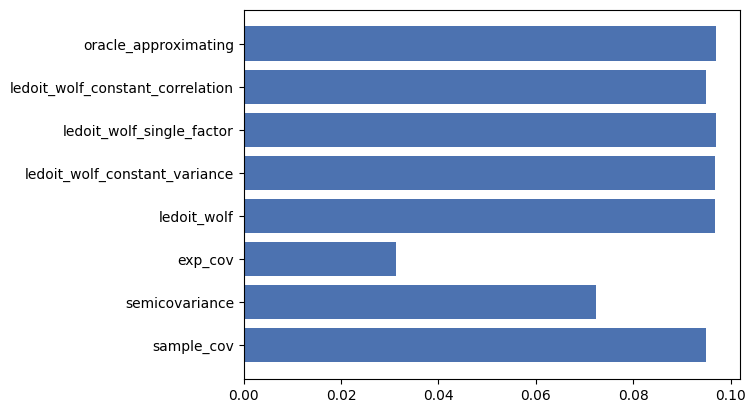

In [9]:
future_variance = np.diag(future_cov)
mean_abs_errors = []

risk_methods = [
    "sample_cov",
    "semicovariance",
    "exp_cov",
    "ledoit_wolf",
    "ledoit_wolf_constant_variance",
    "ledoit_wolf_single_factor",
    "ledoit_wolf_constant_correlation",
    "oracle_approximating",
]

for method in risk_methods:
    S = risk_models.risk_matrix(past_df, method=method)
    past_variance = np.diag(S)
    mean_abs_errors.append(np.sum(np.abs(past_variance - future_variance)) / len(variance))
    
xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, risk_methods)
plt.show()

- We can see that the exponential covariance matrix is a much better estimator of future variance compared to the other models. 
- Its mean absolute error is 2%, which is actually pretty good. 
- Let's visually compare the exponential cov matrix to the realised future cov matrix:

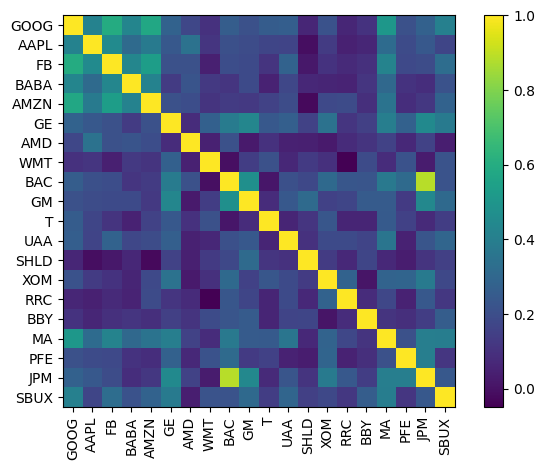

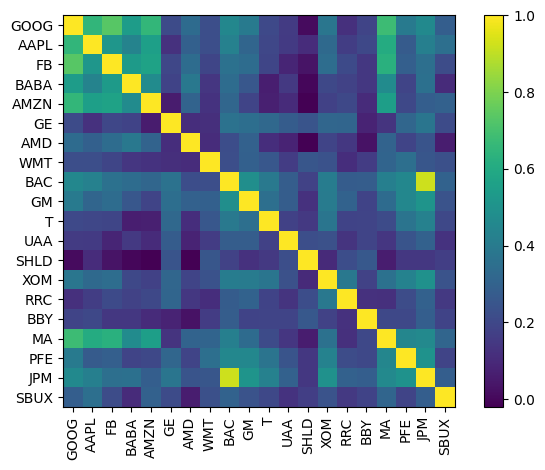

In [7]:
exp_cov = risk_models.exp_cov(past_df)
plotting.plot_covariance(exp_cov, plot_correlation=True)
plotting.plot_covariance(future_cov, plot_correlation=True)
plt.show()

### 2. Returns

- What about returns? 
- Will the exponentially-weighted returns similarly be the best performer?

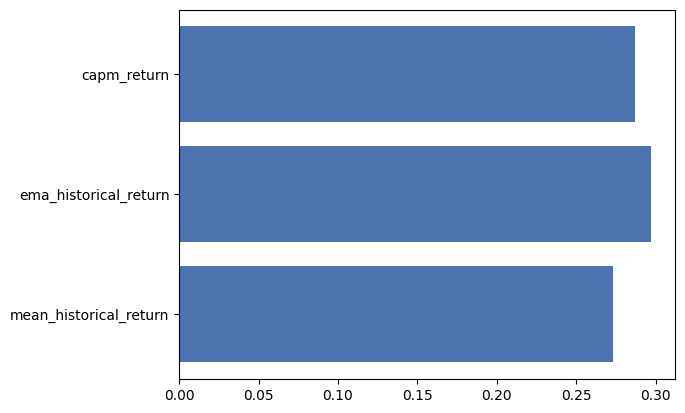

In [10]:
future_rets = expected_returns.mean_historical_return(future_df)
mean_abs_errors = []
return_methods = [
    "mean_historical_return",
    "ema_historical_return",
    "capm_return",
    ]

for method in return_methods:
    mu = expected_returns.return_model(past_df, method=method)
    mean_abs_errors.append(np.sum(np.abs(mu - future_rets)) / len(mu))
    
xrange = range(len(mean_abs_errors))
plt.barh(xrange, mean_abs_errors)
plt.yticks(xrange, return_methods)
plt.show()

In [11]:
print(mean_abs_errors)

[0.2732675295106071, 0.29740354389638524, 0.28701847303235856]


- The exponential moving average is marginally better than the others, 
    - but the improvement is almost unnoticeable. 
- We also note that the mean absolute deviations are above 25%, 
    - meaning that if your expected annual returns are 10%, 
    - on average the realised annual return could be anywhere from a 15% loss to a 35% gain. 
- This is a massive range, 
    - and gives some context to the advice in the docs 
    - suggesting that you optimize without providing an estimate of returns.

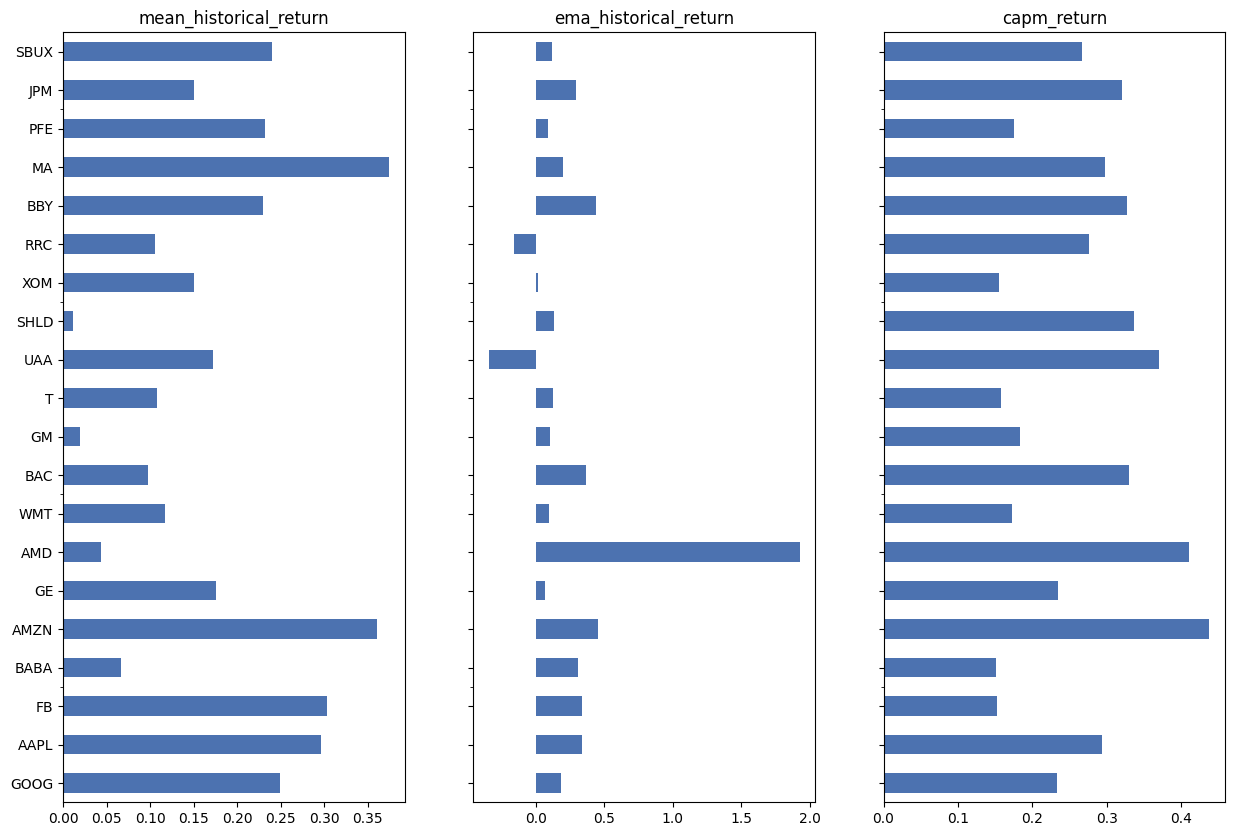

In [12]:
fig, axs = plt.subplots( 1, len(return_methods),sharey=True, figsize=(15,10))

for i, method in enumerate(return_methods):
    mu = expected_returns.return_model(past_df, method=method)
    axs[i].set_title(method)
    mu.plot.barh(ax=axs[i])

The good news is that we see a good degree of agreement (apart from the `ema` method).